In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
# relate numbers (1, -1, 0) to symbols ('x', 'o', ' ')
symbols = {1: 'x', -1: 'o', 0: ' '}

n_rows = 6
n_columns = 7
winning_sum = 4

diagonal_shifts = xrange(-2, 4, 1)


In [20]:
class ConnectFourGame:
    def __init__(self):
        self.game_state = np.zeros((n_rows, n_columns), dtype=int)

    """Prints current game state"""
    def print_game_state(self):
        state_matrix = np.copy(self.game_state.astype(object))

        for n in [-1, 0, 1]:
            state_matrix[state_matrix == n] = symbols[n]
        print state_matrix
        print "\n"

    """
    If parameter column is equal to None, that means, that
    move is made at random.
    """
    def make_move(self, p, column=None):
        if column is None:
            column = self.__select_column_at_random()

        # Slicing the whole target column and finding first available
        # row for insertion of a new element.
        chosen_column = self.game_state[:, column]
        desired_row = -1
        for i, e in list(enumerate(chosen_column)):
            if e == 0:
                desired_row = i

        # If an empty cell was found
        if desired_row != -1:
            self.game_state[desired_row, column] = p

    """This method checks whether one player has won the game"""
    def move_was_winning_move(self):

        # Check all rows if there is a winning combination
        for i in range(n_rows):
            row_to_check = self.game_state[i, :]
            if (row_to_check == 0).sum() <= 3:
                if self.__check_all_sublists(row_to_check):
                    return True

        # Check all columns if there is a winning combination
        for i in range(n_columns):
            column_to_check = self.game_state[:, i]
            if (column_to_check == 0).sum() <= 3:
                if self.__check_all_sublists(column_to_check):
                    return True

        # TODO proper naming in comments required

        # Check all diagonals of length at least 4
        # if there is a winning combination
        for i in diagonal_shifts:
            diagonal = self.game_state.diagonal(i)
            if (diagonal == 0).sum() <= 3:
                if self.__check_all_sublists(diagonal):
                    return True

        # Check all non-main diagonals of length at least 4
        # if there is a winning combination
        for i in diagonal_shifts:
            diagonal = np.rot90(self.game_state).diagonal(i)
            if (diagonal == 0).sum() <= 3:
                if self.__check_all_sublists(diagonal):
                    return True
        return False

    """Constructs sublists of given list and
    check whether there is a winning combination for sublists with length 4"""
    def __check_all_sublists(self, list_to_check):
        sublists = [list_to_check[i:i + winning_sum] for i in
                    range(0, len(list_to_check), 1)]

        for sublist in sublists:
            if len(sublist) < winning_sum:
                continue
            if np.abs(np.sum(sublist)) == winning_sum:
                return True

        return False

    """Checks whether there are still empty cells in matrix"""
    def move_still_possible(self):
        return not (self.game_state[self.game_state == 0].size == 0)

    """Returns index of randomly chosen column for element insertion"""
    def __select_column_at_random(self):
        xs, ys = np.where(self.game_state == 0)
        i = np.random.permutation(np.arange(ys.size))[0]
        return ys[i]


In [21]:
x_wins = 0
o_wins = 0
draws = 0

In [22]:
def run_random_game():
    global x_wins
    global o_wins
    global draws
    game = ConnectFourGame()

    # initialize player number, move counter
    player = 1
    mvcntr = 1

    # initialize flag that indicates win
    no_winner_yet = True

    while game.move_still_possible() and no_winner_yet:
        # get player symbol
        name = symbols[player]
        #print '%s moves' % name

        # let player move at random
        game.make_move(player)

        # print current game state
        #game.print_game_state()

        # evaluate game state
        if game.move_was_winning_move():
            #print 'player %s wins after %d moves' % (name, mvcntr)
            no_winner_yet = False
            if player == 1:
                x_wins += 1
            else:
                o_wins += 1

        # switch player and increase move counter
        player *= -1
        mvcntr += 1

    if no_winner_yet:
        # print 'game ended in a draw'
        draws += 1

In [23]:
x_wins, o_wins, draws = 0, 0, 0 
for i in range(10000):
    run_random_game()

In [24]:
print x_wins
print o_wins
print draws

5669
4304
27


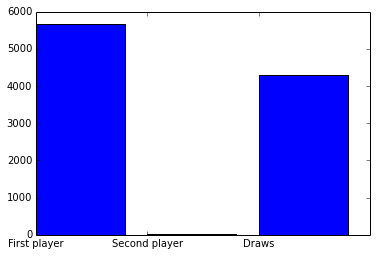

In [25]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.arange(3)
money = [x_wins, draws, o_wins]


fig, ax = plt.subplots()
plt.bar(x, money)
plt.xticks(x, ('First player', 'Second player', 'Draws'))
plt.show()

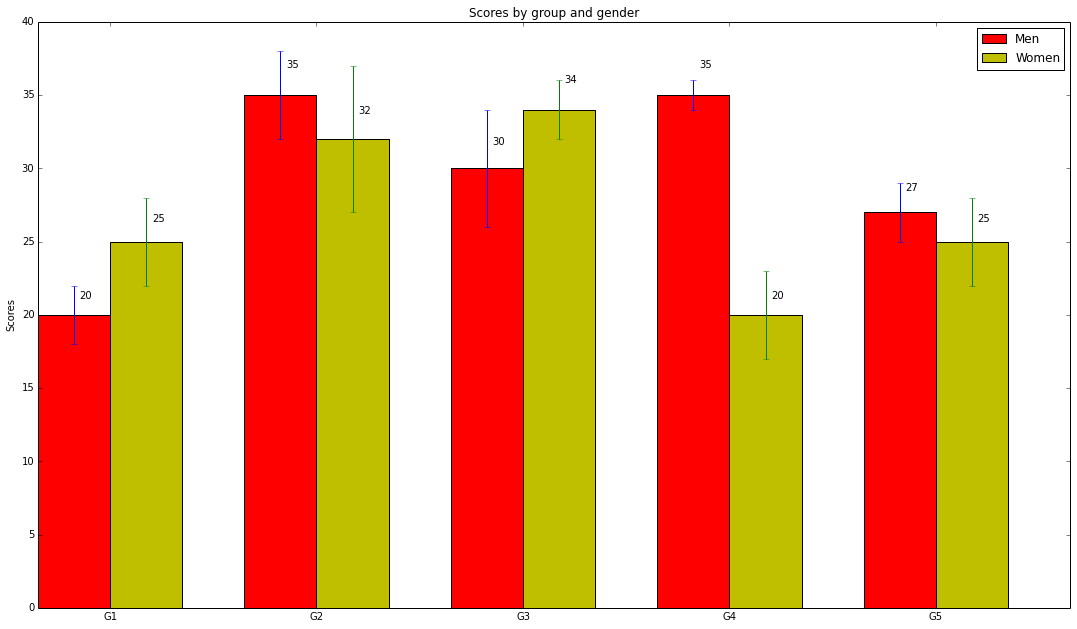

In [26]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

fig.set_size_inches(18.5, 10.5)
women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/1.5, 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()